In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# EDA

In [3]:
df.shape

(200, 5)

We have 200 rows and 5 columns in dataset

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

All the columns have float type dataset

In [5]:
# Checking the null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Dataset has no missing value

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='sales', ylabel='Density'>

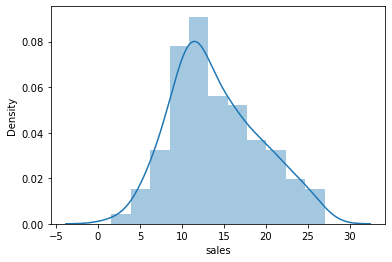

In [15]:
sn.distplot(df.sales)

<AxesSubplot:xlabel='TV', ylabel='Density'>

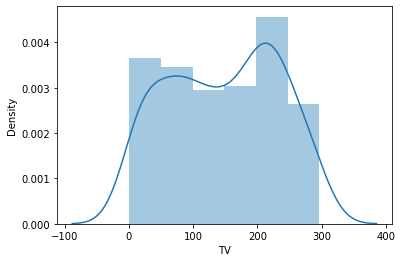

In [6]:
sn.distplot(df.TV)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

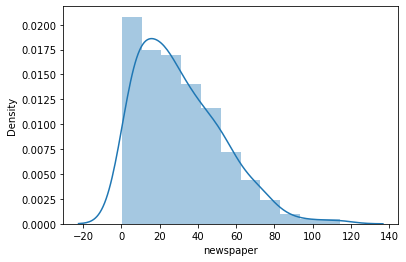

In [7]:
sn.distplot(df.newspaper)

<AxesSubplot:xlabel='radio', ylabel='Density'>

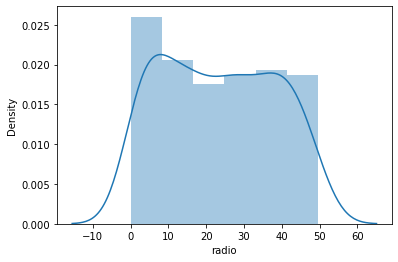

In [8]:
sn.distplot(df.radio)

# Identifying Outliers

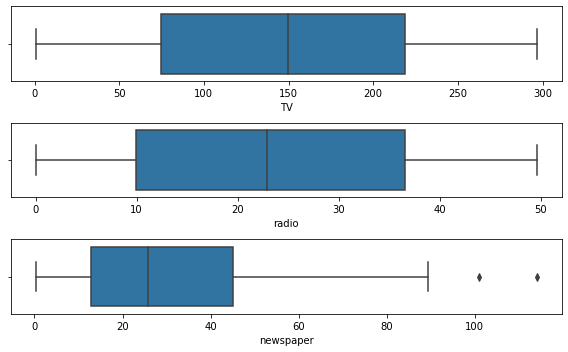

In [10]:
figure , ax = plt.subplots(3 , figsize = (8,5))
plt_tv = sn.boxplot(df["TV"] , ax = ax[0])
plt_radio = sn.boxplot(df["radio"] , ax = ax[1])
plt_newspaper = sn.boxplot(df["newspaper"] , ax = ax[2])
plt.tight_layout()


 There are no considerable outliers present in the data.

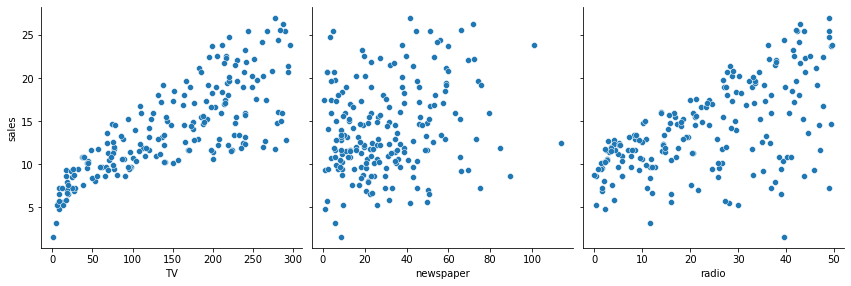

In [13]:
# Let's see how Sales are related with other variables using scatter plot.
sn.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

# Multi-variate Analysis

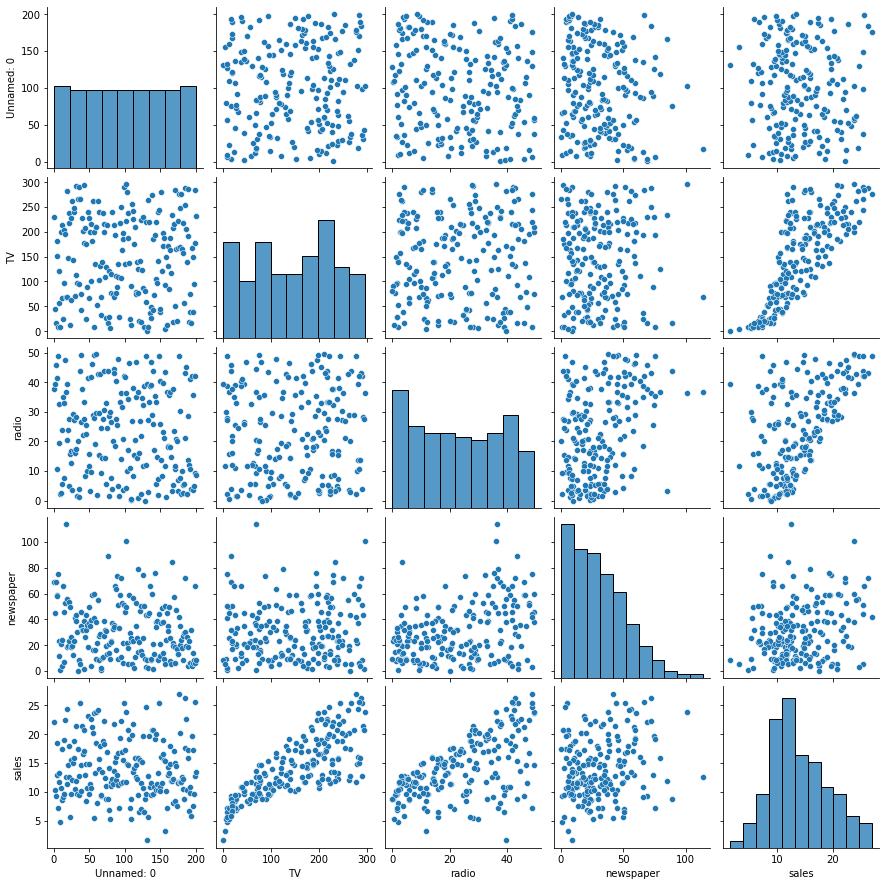

In [5]:
sn.pairplot(df)
plt.show()

# Checking for Corelation

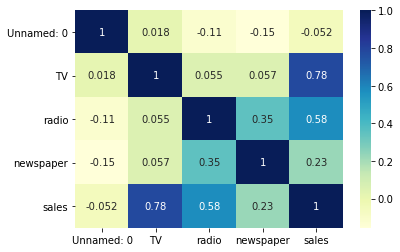

In [14]:
# Let's see the correlation between different variables.
sn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Importing Label Encoder

In [9]:
columns=df.columns
columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df = df.apply(LabelEncoder().fit_transform)

In [12]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,0,153,131,159,106
1,1,32,136,124,31
2,2,12,156,160,23
3,3,98,142,149,89
4,4,112,41,148,54


# Find the best random_state

In [13]:
x = df.drop(['sales'] , axis=1)
y = df['sales']

In [14]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [17]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
models = [SVR(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),LinearRegression()]
for m in models:
    print(m)
    print('Cross Validation Score:',np.mean(cross_val_score(m,x_train,y_train,scoring='neg_mean_squared_error',cv=10)))

SVR()
Cross Validation Score: -571.9945965529201
DecisionTreeRegressor()
Cross Validation Score: -57.1
RandomForestRegressor()
Cross Validation Score: -26.92274333333334
AdaBoostRegressor()
Cross Validation Score: -52.06614448483085
GradientBoostingRegressor()
Cross Validation Score: -20.526183458430893
LinearRegression()
Cross Validation Score: -109.94715839374219


In [20]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),AdaBoostRegressor(),
        RandomForestRegressor()]

In [21]:
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    

    r2=r2_score(y_test,p)
    r2list.append(r2)
    print(m)
    print('R2 Score',r2)
    print('----------------------------')

In [22]:
for i in models:
    create_model(i)

SVR()
R2 Score 0.4897971940218624
----------------------------
DecisionTreeRegressor()
R2 Score 0.9602158680267863
----------------------------
LinearRegression()
R2 Score 0.9189419052067982
----------------------------
AdaBoostRegressor()
R2 Score 0.960954460730834
----------------------------
RandomForestRegressor()
R2 Score 0.9867062243848806
----------------------------


# Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [32]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.9189464538148738

In [33]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],
    'max_features':[2,3,4]}
]
reg = RandomForestRegressor(random_state=44)
grid_search_cv = GridSearchCV(estimator=reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search_cv.best_params_,grid_search_cv.best_estimator_

({'max_features': 4, 'n_estimators': 30},
 RandomForestRegressor(max_features=4, n_estimators=30, random_state=44))

In [35]:
rnd_reg=grid_search_cv.best_estimator_

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
y_pred = rnd_reg.predict(x_test)
final_mse = mean_squared_error(y_test,y_pred)
print(np.sqrt(final_mse))

3.884862359924165


In [38]:
# LinearRegression
linereg = LinearRegression()

In [40]:
linereg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_predict = linereg.predict(x_test)

In [42]:
# Prediction
y_predict

array([ 4.21987349e+01,  5.95344571e+01,  9.89026482e+00,  7.65807304e+01,
        3.68420271e+00,  4.50973138e+01,  1.90587038e+01,  3.47520779e+01,
        2.56510636e+01,  5.29933234e+01, -1.04038132e+01,  4.67014939e+01,
        2.94984753e+01,  1.74315599e+01,  8.58421758e+01, -1.20618960e-01,
        1.99234890e+01,  7.47930695e+01,  8.22533197e+01,  2.54934004e+01,
        6.96541727e+01,  9.02935048e+01,  2.57823123e+01,  7.60601951e+01,
        3.01234963e+01,  8.23079225e+01,  1.15496859e+02,  4.77875337e+01,
        9.40246263e+01,  4.44511104e+01,  4.81604834e+01,  8.18620518e+00,
        5.71899315e+01,  9.90385800e+01,  9.35022269e+01,  6.29644356e+01,
        3.35028518e+01,  1.21767868e+02,  4.10136043e+01,  4.35571941e+01,
        1.89013854e+01,  1.07995879e+02,  4.49697512e+00,  5.65745481e+01,
        7.99739007e+01,  7.05268013e+01,  6.30250547e+01,  2.26716451e+01,
        4.14014096e+01,  6.40204482e+01])

In [44]:
from sklearn import metrics


In [45]:
# Model Evaluation
print("Mean Abs Error :",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Sq Error  :",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Sq Error :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("r2 value   :",metrics.r2_score(y_test,y_predict))

Mean Abs Error : 7.157557150336121
Mean Sq Error  : 81.8646552596321
Root Mean Sq Error : 9.04790888877823
r2 value   : 0.9189419052067982


Random Forest Regressor accuracy is 0.98
Linear Regression accuracy is 0.91

Hence, Random Forest Regressor are the Best Model.Its accuracy is 0.98

# Saving the model

In [55]:
import joblib
joblib.dump(reg,"prediction.pkl")

['prediction.pkl']